In [1]:
import mysql.connector as conn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
cn_var = conn.connect(host = "localhost", user = "root", password = "")
cursor = cn_var.cursor(buffered = True)

In [3]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [4]:
cursor.execute('create database if not exists SalesWalmart')

In [5]:
cursor.execute('show databases')
cursor.fetchall()

[('employee',),
 ('glassdb',),
 ('imdb',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('saleswalmart',),
 ('sffilmlocations',),
 ('sys',)]

In [6]:
cursor.execute('use saleswalmart')

In [7]:
cursor.execute('create table if not exists saleswalmart.wmsales(invoice_id varchar(50) not null primary key, branch varchar(5) not null, city varchar(30), customer_type varchar(50) not null, customer_name varchar(50) not null, gender varchar(50) not null, product_line varchar(50) not null, unit_price decimal(10,2) not null, quantity int not null, vat float(6,4) not null, total decimal(12,4) not null, date datetime not null, time TIME not null, payment_method varchar(30) not null, cogs decimal(10,2) not null, gross_margin_pct float(11,9), gross_income decimal(12,4) not null, rating float(2,1))')

In [8]:
cursor.execute('select * from saleswalmart.wmsales')
cursor.fetchall()

[('101-41-6861',
  'C',
  'Chandigarh',
  'Normal',
  'Aanya Sharma',
  'Female',
  'Sports and travel',
  Decimal('69.72'),
  4,
  13.944,
  Decimal('292.8240'),
  datetime.datetime(2015, 8, 11, 0, 0),
  datetime.timedelta(seconds=39997),
  'Cash',
  Decimal('278.88'),
  4.761904716,
  Decimal('13.9440'),
  3.4,
  'Tuesday',
  'August'),
 ('103-43-5338',
  'B',
  'Kolkata',
  'Member',
  'Leela Yadav',
  'Female',
  'Food and beverages',
  Decimal('82.36'),
  8,
  32.944,
  Decimal('691.8240'),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.timedelta(seconds=33545),
  'Cash',
  Decimal('658.88'),
  4.761904716,
  Decimal('32.9440'),
  5.8,
  'Saturday',
  'November'),
 ('104-94-2594',
  'C',
  'Hyderabad',
  'Member',
  'Parina Patel',
  'Female',
  'Clothing',
  Decimal('96.30'),
  9,
  43.335,
  Decimal('910.0350'),
  datetime.datetime(2022, 12, 21, 0, 0),
  datetime.timedelta(seconds=39769),
  'Credit Card',
  Decimal('866.70'),
  4.761904716,
  Decimal('43.3350'),
  4.1,
  'W

In [9]:
cursor.execute('select date, dayname(date) from saleswalmart.wmsales')
cursor.fetchall()

[(datetime.datetime(2015, 8, 11, 0, 0), 'Tuesday'),
 (datetime.datetime(2017, 11, 11, 0, 0), 'Saturday'),
 (datetime.datetime(2022, 12, 21, 0, 0), 'Wednesday'),
 (datetime.datetime(2019, 2, 6, 0, 0), 'Wednesday'),
 (datetime.datetime(2017, 11, 7, 0, 0), 'Tuesday'),
 (datetime.datetime(2015, 12, 10, 0, 0), 'Thursday'),
 (datetime.datetime(2016, 1, 3, 0, 0), 'Sunday'),
 (datetime.datetime(2019, 6, 17, 0, 0), 'Monday'),
 (datetime.datetime(2021, 11, 2, 0, 0), 'Tuesday'),
 (datetime.datetime(2015, 6, 13, 0, 0), 'Saturday'),
 (datetime.datetime(2015, 7, 30, 0, 0), 'Thursday'),
 (datetime.datetime(2017, 7, 31, 0, 0), 'Monday'),
 (datetime.datetime(2016, 11, 10, 0, 0), 'Thursday'),
 (datetime.datetime(2021, 8, 22, 0, 0), 'Sunday'),
 (datetime.datetime(2023, 5, 24, 0, 0), 'Wednesday'),
 (datetime.datetime(2018, 10, 30, 0, 0), 'Tuesday'),
 (datetime.datetime(2017, 10, 7, 0, 0), 'Saturday'),
 (datetime.datetime(2019, 2, 8, 0, 0), 'Friday'),
 (datetime.datetime(2016, 6, 4, 0, 0), 'Saturday'),
 (d

In [ ]:
cursor.execute('alter table wmsales add column day_name varchar(10);')

In [61]:
cursor.execute('update wmsales set day_name = dayname(date)')

In [62]:
cursor.execute('select * from wmsales')
cursor.fetchall()

[('101-41-6861',
  'C',
  'Chandigarh',
  'Normal',
  'Aanya Sharma',
  'Female',
  'Sports and travel',
  Decimal('69.72'),
  4,
  13.944,
  Decimal('292.8240'),
  datetime.datetime(2015, 8, 11, 0, 0),
  datetime.timedelta(seconds=39997),
  'Cash',
  Decimal('278.88'),
  4.761904716,
  Decimal('13.9440'),
  3.4,
  'Tuesday'),
 ('103-43-5338',
  'B',
  'Kolkata',
  'Member',
  'Leela Yadav',
  'Female',
  'Food and beverages',
  Decimal('82.36'),
  8,
  32.944,
  Decimal('691.8240'),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.timedelta(seconds=33545),
  'Cash',
  Decimal('658.88'),
  4.761904716,
  Decimal('32.9440'),
  5.8,
  'Saturday'),
 ('104-94-2594',
  'C',
  'Hyderabad',
  'Member',
  'Parina Patel',
  'Female',
  'Clothing',
  Decimal('96.30'),
  9,
  43.335,
  Decimal('910.0350'),
  datetime.datetime(2022, 12, 21, 0, 0),
  datetime.timedelta(seconds=39769),
  'Credit Card',
  Decimal('866.70'),
  4.761904716,
  Decimal('43.3350'),
  4.1,
  'Wednesday'),
 ('105-41-4587

In [68]:
cursor.execute('alter table wmsales modify column month_name varchar(100)')

In [69]:
cursor.execute('update wmsales set month_name = monthname(date)')

In [70]:
cursor.execute('select * from wmsales')
cursor.fetchall()

[('101-41-6861',
  'C',
  'Chandigarh',
  'Normal',
  'Aanya Sharma',
  'Female',
  'Sports and travel',
  Decimal('69.72'),
  4,
  13.944,
  Decimal('292.8240'),
  datetime.datetime(2015, 8, 11, 0, 0),
  datetime.timedelta(seconds=39997),
  'Cash',
  Decimal('278.88'),
  4.761904716,
  Decimal('13.9440'),
  3.4,
  'Tuesday',
  'August'),
 ('103-43-5338',
  'B',
  'Kolkata',
  'Member',
  'Leela Yadav',
  'Female',
  'Food and beverages',
  Decimal('82.36'),
  8,
  32.944,
  Decimal('691.8240'),
  datetime.datetime(2017, 11, 11, 0, 0),
  datetime.timedelta(seconds=33545),
  'Cash',
  Decimal('658.88'),
  4.761904716,
  Decimal('32.9440'),
  5.8,
  'Saturday',
  'November'),
 ('104-94-2594',
  'C',
  'Hyderabad',
  'Member',
  'Parina Patel',
  'Female',
  'Clothing',
  Decimal('96.30'),
  9,
  43.335,
  Decimal('910.0350'),
  datetime.datetime(2022, 12, 21, 0, 0),
  datetime.timedelta(seconds=39769),
  'Credit Card',
  Decimal('866.70'),
  4.761904716,
  Decimal('43.3350'),
  4.1,
  'W

In [71]:
# converting this table in pandas dataframe for a better view and plotting

In [11]:
db_url = 'mysql://root@localhost/saleswalmart'
engine = create_engine(db_url)

In [12]:
query = 'select * from saleswalmart.wmsales'
df = pd.read_sql(query, con=engine)
df

,invoice_id,branch,city,customer_type,customer_name,gender,product_line,unit_price,quantity,vat,total,date,time,payment_method,cogs,gross_margin_pct,gross_income,rating,day_name,month_name
0,101-41-6861,C,Chandigarh,Normal,Aanya Sharma,Female,Sports and travel,69.72,4,13.9440,292.8240,2015-08-11,0 days 11:06:37,Cash,278.88,4.761905,13.9440,3.4,Tuesday,August
1,103-43-5338,B,Kolkata,Member,Leela Yadav,Female,Food and beverages,82.36,8,32.9440,691.8240,2017-11-11,0 days 09:19:05,Cash,658.88,4.761905,32.9440,5.8,Saturday,November
2,104-94-2594,C,Hyderabad,Member,Parina Patel,Female,Clothing,96.30,9,43.3350,910.0350,2022-12-21,0 days 11:02:49,Credit Card,866.70,4.761905,43.3350,4.1,Wednesday,December
3,105-41-4587,D,Chennai,Normal,Hema Sahu,Female,Electronic accessories,63.85,3,9.5775,201.1275,2019-02-06,0 days 18:39:35,Cash,191.55,4.761905,9.5775,5.1,Wednesday,February
4,107-91-1124,B,Nagpur,Normal,Ishana Sharma,Female,Food and beverages,70.02,10,35.0100,735.2100,2017-11-07,0 days 20:50:49,Credit Card,700.20,4.761905,35.0100,6.4,Tuesday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,994-55-9697,D,Mumbai,Normal,Jia Kapoor,Female,Books,75.34,4,15.0680,316.4280,2018-08-21,0 days 02:05:55,Ewallet,301.36,4.761905,15.0680,8.5,Tuesday,August
733,995-20-8258,C,Nashik,Normal,Akash Sharma,Male,Sports and travel,66.85,3,10.0275,210.5775,2023-03-19,0 days 22:45:02,Cash,200.55,4.761905,10.0275,5.2,Sunday,March
734,998-10-2620,A,Vishakhapatnam,Member,Inder Rajput,Male,Sports and travel,22.04,5,5.5100,115.7100,2020-08-16,0 days 21:41:05,Cash,110.20,4.761905,5.5100,4.7,Sunday,August
735,998-70-8083,B,Vishakhapatnam,Member,Bela Yadav,Female,Health and beauty,65.28,4,13.0560,274.1760,2020-09-16,0 days 04:18:24,Ewallet,261.12,4.761905,13.0560,2.8,Wednesday,September


In [74]:
df.shape

(737, 20)

In [75]:
df.describe()

,unit_price,quantity,vat,total,date,time,cogs,gross_margin_pct,gross_income,rating
count,737.000000,737.000000,737.000000,737.000000,737,737,737.000000,7.370000e+02,737.000000,737.000000
mean,53.320326,5.388060,14.293513,300.163771,2019-07-23 09:22:42.822252288,0 days 11:29:57.814111261,285.870258,4.761905e+00,14.293513,5.392673
min,10.170000,1.000000,0.629000,13.209000,2015-01-09 00:00:00,0 days 00:00:35,12.580000,4.761905e+00,0.629000,1.000000
25%,30.230000,3.000000,5.446500,114.376500,2017-05-05 00:00:00,0 days 05:23:55,108.930000,4.761905e+00,5.446500,3.100000
50%,52.780000,5.000000,11.164500,234.454500,2019-08-21 00:00:00,0 days 11:17:52,223.290000,4.761905e+00,11.164500,5.300000
75%,74.740000,8.000000,20.696000,434.616000,2021-10-17 00:00:00,0 days 17:26:37,413.920000,4.761905e+00,20.696000,7.600000
max,99.920000,10.000000,48.945000,1027.845000,2023-12-31 00:00:00,0 days 23:59:00,978.900000,4.761905e+00,48.945000,9.900000
std,25.870109,2.801158,10.948394,229.916273,NaN,0 days 06:57:44.710047020,218.967879,1.688685e-14,10.948394,2.589223


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737 entries, 0 to 736
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   invoice_id        737 non-null    object         
 1   branch            737 non-null    object         
 2   city              737 non-null    object         
 3   customer_type     737 non-null    object         
 4   customer_name     737 non-null    object         
 5   gender            737 non-null    object         
 6   product_line      737 non-null    object         
 7   unit_price        737 non-null    float64        
 8   quantity          737 non-null    int64          
 9   vat               737 non-null    float64        
 10  total             737 non-null    float64        
 11  date              737 non-null    datetime64[ns] 
 12  time              737 non-null    timedelta64[ns]
 13  payment_method    737 non-null    object         
 14  cogs      

In [77]:
# to check how many distinct cities are there

query = 'select distinct city from wmsales order by city asc'
df = pd.read_sql(query, con=engine)
df

,city
0,Agra
1,Ahmedabad
2,Bangalore
3,Bhopal
4,Chandigarh
5,Chennai
6,Hyderabad
7,Indore
8,Jaipur
9,Kochi


In [78]:
# to check in which city is each branch

query = 'SELECT DISTINCT city, branch FROM wmsales'
df = pd.read_sql_query(query, con=engine)
df

,city,branch
0,Chandigarh,C
1,Kolkata,B
2,Hyderabad,C
3,Chennai,D
4,Nagpur,B
...,...,...
95,Chennai,B
96,Agra,D
97,Vadodara,E
98,Nashik,D


In [79]:
#to check how many product line are there. product line is nothing but categories

query = 'SELECT count(distinct product_line) as product_line from wmsales' 
df = pd.read_sql_query(query, con=engine)
df

,product_line
0,7


In [80]:
# to check what is the most selling product line

query = 'SELECT product_line, count(product_line) as cnt from wmsales group by product_line order by cnt desc limit 5'
df = pd.read_sql_query(query, con=engine)
df

,product_line,cnt
0,Home and lifestyle,123
1,Food and beverages,118
2,Electronic accessories,106
3,Health and beauty,106
4,Books,97


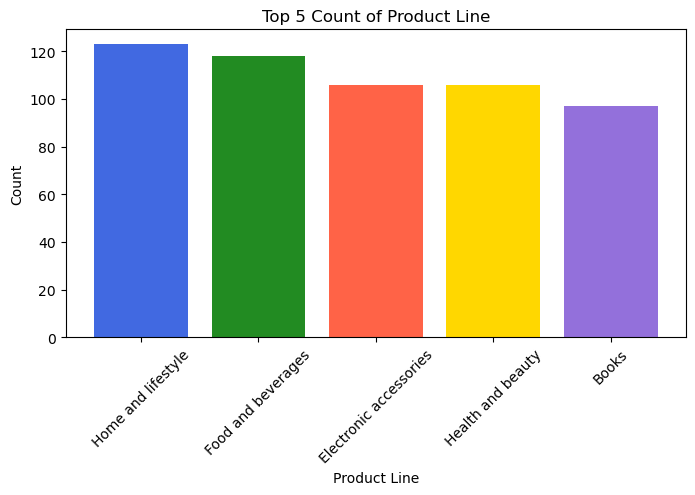

In [81]:
colors = ['royalblue', 'forestgreen', 'tomato', 'gold', 'mediumpurple']

plt.figure(figsize=(8,4))
plt.bar(df['product_line'], df['cnt'], color = colors)
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.title('Top 5 Count of Product Line')
plt.xticks(rotation = 45)
plt.show()

In [82]:
# to check the most common payment method

query = 'select payment_method, count(payment_method) as cnt from wmsales group by payment_method order by cnt desc'
df = pd.read_sql(query, con = engine)
df

,payment_method,cnt
0,Ewallet,253
1,Cash,248
2,Credit Card,236


In [83]:
# to check total revenue by month from most sell to least

query = 'select month_name as month, sum(total) as Total_Revenue from wmsales group by month_name order by Total_Revenue desc'
df = pd.read_sql(query, con=engine)
df

,month,Total_Revenue
0,June,23193.5550
1,October,21393.7920
2,May,20984.1450
3,July,20729.9190
4,December,20443.9515
5,August,19774.3455
6,November,18011.7525
7,March,17451.0840
8,April,16333.5060
9,January,15030.6975


In [84]:
import plotly.express as px

fig = px.line(df, x='month', y='Total_Revenue', markers=True, line_shape='linear', text=df['Total_Revenue'])

fig.update_traces(textposition='top center', hoverinfo='x+y')

fig.update_layout(
    title='Top 5 Total Revenue by Month',
    xaxis_title='Month',
    yaxis_title='Total Revenue'
)

fig.show()

In [85]:
# to check the month having largest cogs (note that least the cogs more the profit for business, a higher cogs indicates trouble)

query = 'select month_name as month, sum(cogs) as cogs from wmsales group by month_name order by cogs desc'
df = pd.read_sql(query, con=engine)
df

,month,cogs
0,June,22089.10
1,October,20375.04
2,May,19984.90
3,July,19742.78
4,December,19470.43
5,August,18832.71
6,November,17154.05
7,March,16620.08
8,April,15555.72
9,January,14314.95


In [86]:
# to check the city with largest revenue

query = 'select city, sum(total) as Total_Revenue from wmsales group by city order by Total_Revenue DESC'
df = pd.read_sql(query, con=engine)
df

,city,Total_Revenue
0,Jaipur,17936.6355
1,Vadodara,14087.3775
2,Agra,13874.5215
3,Kolkata,13020.2100
4,Indore,12278.0805
5,Kochi,12185.0610
6,Chandigarh,11928.0630
7,Nagpur,11758.1730
8,Bangalore,11203.8990
9,Mumbai,10745.6160


In [87]:
query = 'select city, sum(total) as Total_Revenue from wmsales group by city order by Total_Revenue DESC limit 5'
df = pd.read_sql(query, con=engine)
df

,city,Total_Revenue
0,Jaipur,17936.6355
1,Vadodara,14087.3775
2,Agra,13874.5215
3,Kolkata,13020.2100
4,Indore,12278.0805


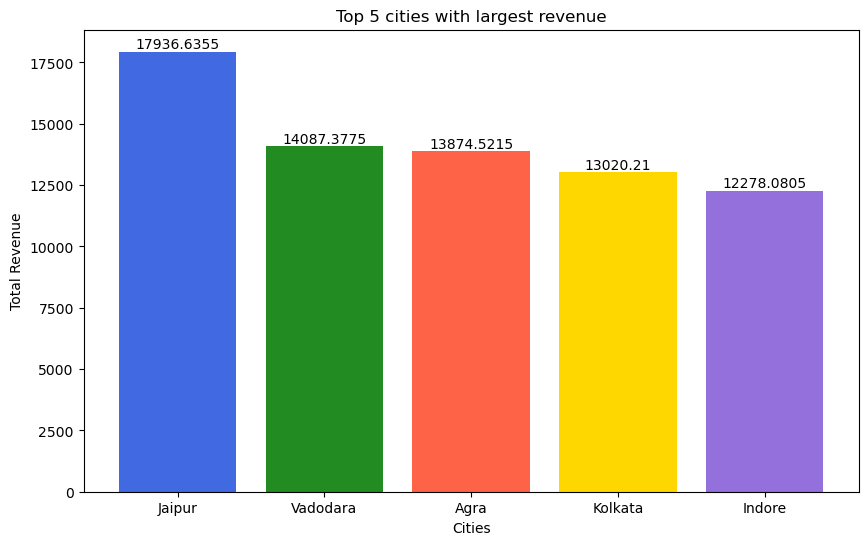

In [88]:
colors = ['royalblue', 'forestgreen', 'tomato', 'gold', 'mediumpurple']

plt.figure(figsize=(10,6))
bars = plt.bar(df['city'], df['Total_Revenue'], color = colors)
plt.xlabel('Cities')
plt.ylabel('Total Revenue')
plt.title('Top 5 cities with largest revenue')

for bar, value in zip(bars, df['Total_Revenue']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

plt.show()

In [89]:
# to check the product line having largest VAT

query = 'select product_line, sum(vat) as Valuable_Tax from wmsales group by product_line order by Valuable_Tax DESC '
df = pd.read_sql(query, con=engine)
df

,product_line,Valuable_Tax
0,Home and lifestyle,1829.5335
1,Clothing,1745.8070
2,Health and beauty,1599.5480
3,Food and beverages,1508.7830
4,Books,1417.4105
5,Electronic accessories,1301.9670
6,Sports and travel,1131.2700


In [90]:
query = 'select product_line, sum(vat) as Valuable_Tax from wmsales group by product_line order by Valuable_Tax DESC limit 5'
df = pd.read_sql(query, con=engine)
df

,product_line,Valuable_Tax
0,Home and lifestyle,1829.5335
1,Clothing,1745.8070
2,Health and beauty,1599.5480
3,Food and beverages,1508.7830
4,Books,1417.4105


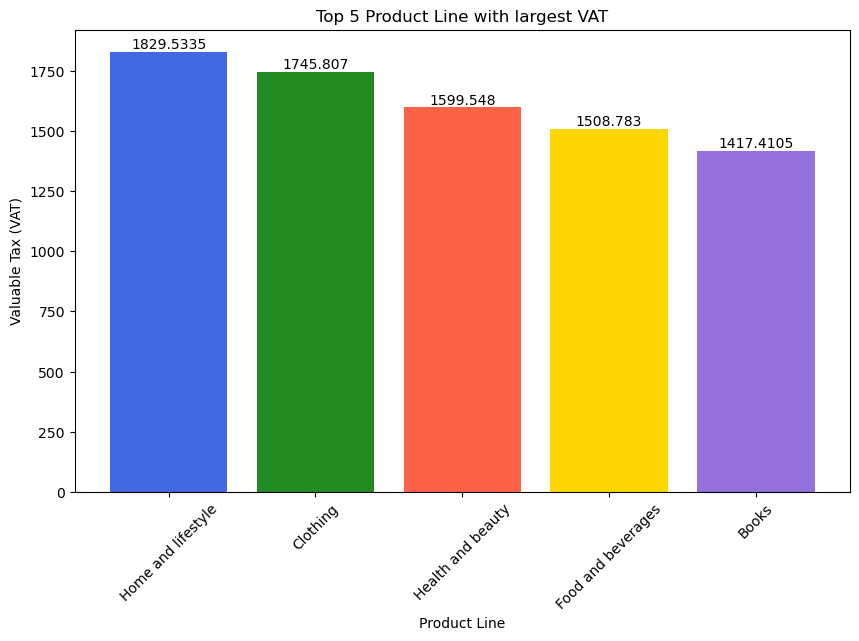

In [91]:
colors = ['royalblue', 'forestgreen', 'tomato', 'gold', 'mediumpurple']

plt.figure(figsize=(10,6))
bars = plt.bar(df['product_line'], df['Valuable_Tax'], color = colors)
plt.xlabel('Product Line')
plt.ylabel('Valuable Tax (VAT)')
plt.title('Top 5 Product Line with largest VAT')

for bar, value in zip(bars, df['Valuable_Tax']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

plt.xticks(rotation = 45)
plt.show()

In [92]:
# to check the most common product line by gender

query = 'select gender, product_line, count(gender) as total_count from wmsales group by gender, product_line order by total_count desc'
df = pd.read_sql(query, con=engine)
df

,gender,product_line,total_count
0,Male,Home and lifestyle,66
1,Male,Food and beverages,62
2,Female,Electronic accessories,61
3,Male,Health and beauty,57
4,Female,Home and lifestyle,57
5,Female,Food and beverages,56
6,Female,Clothing,56
7,Male,Sports and travel,50
8,Male,Books,49
9,Female,Health and beauty,49


In [93]:
query = 'select round(avg (rating), 2) as avg_rating, product_line from wmsales group by product_line order by avg_rating DESC'
df = pd.read_sql(query, con=engine)
df

,avg_rating,product_line
0,5.77,Home and lifestyle
1,5.57,Clothing
2,5.45,Books
3,5.41,Health and beauty
4,5.23,Sports and travel
5,5.15,Food and beverages
6,5.14,Electronic accessories


In [94]:
query = 'select customer_type, round(sum(total), 2) as total_revenue from wmsales group by customer_type order by total_revenue desc'
df = pd.read_sql(query, con=engine)
df

,customer_type,total_revenue
0,Member,114056.46
1,Normal,107164.24


In [95]:
query = 'select gender, count(*) as gender_count_in_C from wmsales where branch = "C" group by gender order by gender_count_in_C desc'
df = pd.read_sql(query, con=engine)
df

,gender,gender_count_in_C
0,Female,81
1,Male,70


In [99]:
query = 'select customer_name, sum(total) as total_spending from wmsales group by customer_name order by total_spending desc'
df = pd.read_sql(query, con=engine)
df

,customer_name,total_spending
0,Tejas Joshi,4191.2325
1,Oishi Tiwari,3631.8450
2,Ishaan Kumar,3354.6555
3,Kunal Gupta,3150.2100
4,Ekta Joshi,3108.3360
...,...,...
187,Eshaan Kapoor,97.1565
188,Hrishikesh Kapoor,75.9780
189,Diya Yadav,75.8100
190,Lalit Yadav,53.6445


In [101]:
query = 'select customer_name, sum(total) as total_spending from wmsales group by customer_name order by total_spending desc limit 5'
df = pd.read_sql(query, con=engine)
df

,customer_name,total_spending
0,Tejas Joshi,4191.2325
1,Oishi Tiwari,3631.8450
2,Ishaan Kumar,3354.6555
3,Kunal Gupta,3150.2100
4,Ekta Joshi,3108.3360


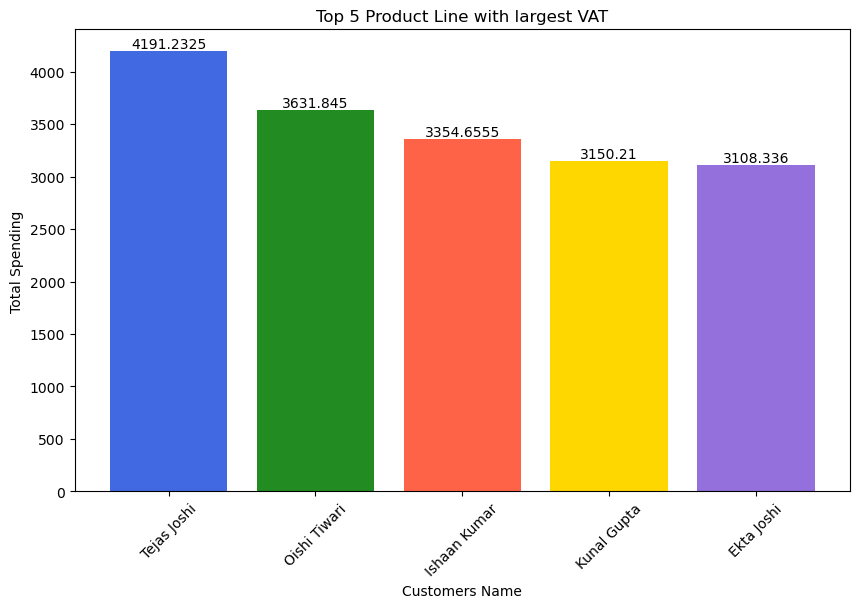

In [103]:
colors = ['royalblue', 'forestgreen', 'tomato', 'gold', 'mediumpurple']

plt.figure(figsize=(10,6))
bars = plt.bar(df['customer_name'], df['total_spending'], color = colors)
plt.xlabel('Customers Name')
plt.ylabel('Total Spending')
plt.title('Top 5 Product Line with largest VAT')

for bar, value in zip(bars, df['total_spending']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(value), ha='center', va='bottom')

plt.xticks(rotation = 45)
plt.show()

In [16]:
# to check unique customers making repeated purchases 

query = 'select count(customer_name) as repeated_customers_count from (select customer_name from wmsales group by customer_name having count(distinct invoice_id) > 1) as repeated_customers'
df = pd.read_sql(query, con=engine)
df

,repeated_customers_count
0,168


In [17]:
# to check any trends in payment method preferences based on customer demographics 

query = 'select customer_type, gender, payment_method, count(*) as payment_count from wmsales group by customer_type, gender, payment_method order by customer_type, gender, payment_count desc'
df = pd.read_sql(query, con=engine)
df

,customer_type,gender,payment_method,payment_count
0,Member,Female,Ewallet,72
1,Member,Female,Cash,65
2,Member,Female,Credit Card,57
3,Member,Male,Cash,71
4,Member,Male,Credit Card,62
5,Member,Male,Ewallet,53
6,Normal,Female,Ewallet,70
7,Normal,Female,Cash,59
8,Normal,Female,Credit Card,46
9,Normal,Male,Credit Card,71


In [23]:
# to check if customer preference vary across different cities

query = 'select city, product_line, count(*) as preference_count from wmsales group by city, product_line order by city, preference_count desc'
df = pd.read_sql(query, con=engine)
df

,city,product_line,preference_count
0,Agra,Sports and travel,10
1,Agra,Home and lifestyle,8
2,Agra,Clothing,7
3,Agra,Books,6
4,Agra,Food and beverages,6
...,...,...,...
135,Vishakhapatnam,Books,6
136,Vishakhapatnam,Electronic accessories,5
137,Vishakhapatnam,Home and lifestyle,4
138,Vishakhapatnam,Sports and travel,2


In [24]:
# to check specifically for a city - suppose for pune

query = 'select city, product_line, count(*) as preference_count from wmsales where city = "pune" group by city, product_line order by city, preference_count desc'
df = pd.read_sql(query, con=engine)
df

,city,product_line,preference_count
0,Pune,Sports and travel,10
1,Pune,Food and beverages,6
2,Pune,Health and beauty,6
3,Pune,Books,5
4,Pune,Home and lifestyle,5
5,Pune,Electronic accessories,4
6,Pune,Clothing,2


In [25]:
# to check average spending per customer

query = 'select customer_name, avg(total) as average_spending from wmsales group by customer_name'
df = pd.read_sql(query, con=engine)
df

,customer_name,average_spending
0,Aanya Sharma,607.15200
1,Leela Yadav,330.38250
2,Parina Patel,381.98475
3,Hema Sahu,189.78400
4,Ishana Sharma,216.84390
...,...,...
187,Aarav Kumar,358.83750
188,Lalit Yadav,53.64450
189,Hrishikesh Kapoor,75.97800
190,Rohit Patel,147.71400


In [39]:
# to check cities having highest spending customers 

query = 'SELECT city, customer_name, total_spending FROM (SELECT city, customer_name, SUM(total) AS total_spending, ROW_NUMBER() OVER (PARTITION BY city ORDER BY SUM(total) DESC) AS spending_rank FROM wmsales GROUP BY city, customer_name) ranked_customers WHERE spending_rank = 1'
df = pd.read_sql(query, con=engine)
df

,city,customer_name,total_spending
0,Agra,Tejas Joshi,1049.9160
1,Ahmedabad,Oviya Sharma,1190.6580
2,Bangalore,Bela Yadav,928.8405
3,Bhopal,Deepesh Verma,1032.5910
4,Chandigarh,Ishaan Kumar,1080.2925
5,Chennai,Farah Joshi,869.4630
6,Hyderabad,Aniket Yadav,1076.3970
7,Indore,Urvashi Joshi,844.7250
8,Jaipur,Bhavna Sharma,909.6150
9,Kochi,Pradeep Chauhan,1162.7490
